#  Applied Machine Learning 

## Homework 5: Evaluation metrics


## Imports

In [1]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

<br><br>

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B. 

- Model A

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 2 | 8 |
| **Actual no disease**       | 0 | 100 |


- Model B

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 6 | 4 |
| **Actual no disease**       | 10 | 90 |

### 1.1 Positive vs. negative class 
rubric={points:2}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

In [2]:
TP = 2
TN = 100
FP = 0
FN = 8

In [3]:
precision = TP/(TP+FP)
precision

1.0

In [4]:
recall = TP/(TP+FN)
recall

0.2

In [5]:
f1score = (2*precision*recall)/(precision+recall)
f1score

0.33333333333333337

model A , no disease is positive.

In [6]:
TP1 = 6
TN1 = 90
FP1 = 10
FN1 = 4

In [7]:
precision1 = TP1/(TP1+FP1)
precision1

0.375

In [8]:
recall1 = TP1/(TP1+FN1)
recall1

0.6

In [9]:
f1score1 = (2*precision1*recall1)/(precision1+recall1)
f1score1

0.4615384615384615

model B ,  no disease is positive.

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [10]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy

0.9272727272727272

In [11]:
accuracy1 = (TP1+TN1)/(TP1+TN1+FP1+FN1)
accuracy1

0.8727272727272727

In [12]:
results_dict = {"A": {"accuracy" : accuracy}, "B": {"accuracy":accuracy1}}

In [13]:
results_dict["A"]["accuracy"] = accuracy
results_dict["B"]["accuracy"] = accuracy1

In [14]:
results_dict

{'A': {'accuracy': 0.9272727272727272}, 'B': {'accuracy': 0.8727272727272727}}

In [15]:
assert tests_hw5.ex1_2_1(
    results_dict["A"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [16]:
assert tests_hw5.ex1_2_2(
    results_dict["B"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [17]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.927273,0.872727


<br><br>

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

we pick model B.

<br><br>

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without using `scikit-learn` tools. 


In [18]:
results_dict["A"]["precision"] = precision
results_dict["B"]["precision"] = precision1
results_dict["A"]["recall"] = recall
results_dict["B"]["recall"] = recall1
results_dict["A"]["f1"] = f1score
results_dict["B"]["f1"] = f1score1

In [19]:
assert tests_hw5.ex1_4_1(
    results_dict["A"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [20]:
assert tests_hw5.ex1_4_2(
    results_dict["B"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [21]:
assert tests_hw5.ex1_4_3(
    results_dict["A"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [22]:
assert tests_hw5.ex1_4_4(
    results_dict["B"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [23]:
assert tests_hw5.ex1_4_5(
    results_dict["A"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [24]:
assert tests_hw5.ex1_4_6(
    results_dict["B"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


Show the dataframe with all results. 

In [25]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.927273,0.872727
precision,1.000000,0.375000
recall,0.200000,0.600000
f1,0.333333,0.461538


<br><br>

### 1.5 Discussion
rubric={points:4}

**Your tasks:**
1. Which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

1) model B is more informative in this problem bcz .
2) model A pick based on this information

<br><br>

### (Optional) 1.6 
rubric={points:1}

**Your tasks:**

Provide 4 to 5 example classification datasets (with links) where accuracy metric would be misleading. Discuss which evaluation metric would be more appropriate for each dataset. You may consider datasets we have used in this course so far. You could also look up datasets on Kaggle. 

<br><br><br><br>

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis and we'll be talking about it later in the course. For now, we'll just treat it as a binary classification problem. 

In [26]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")

<AxesSubplot:>

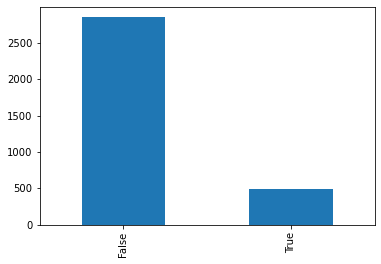

In [27]:
df['churn'].value_counts().plot(kind = 'bar')

In [28]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,False
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,False
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,False
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,True


<br><br>

### 2.1 Distribution of target values
rubric={points:4}

**Your tasks:**

Examine the distribution of target values in the train split. Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

<AxesSubplot:>

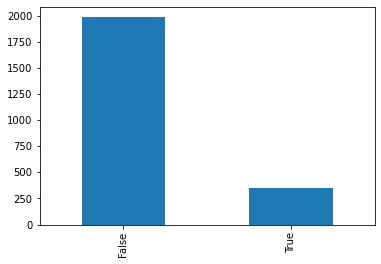

In [29]:
train_df['churn'].value_counts().plot(kind = 'bar')

* Yes,we can see the class imbalanced.
* Yes,we have to do deal with it.
* If we don't do this then the model gives the bias error. 

<br><br>

### (Optional) 2.2 EDA 
rubric={points:1}

**Your tasks:**

Come up with **two** exploratory questions you would like to answer and explore those. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 10) but you don't have to.

In [30]:
# pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [31]:
data = pd.DataFrame(df)
print(data)
import pandas_profiling as pp
# forming ProfileReport and save
# as output.html file
profile = pp.ProfileReport(data)
profile.to_file("output.html")

     state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              

C:\Users\Dhruv\AppData\Local\Temp\ipykernel_4724\2938119717.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<br><br>

### 2.3 Column transformer 
rubric={points:10}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

In each case, briefly explain your rationale with 1-2 sentences. You do not need an explanation for every feature, but for every group of features that are being transformed the same way. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

In [41]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

In [42]:
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [43]:
# make pipeline 
categorical_features = ['state','area_code']
numeric_features = ['account_length','total_day_minutes','total_day_calls','total_eve_minutes','total_eve_calls','total_night_minutes','total_night_calls','total_intl_minutes','total_intl_calls']
binary_features = ['international_plan','voice_mail_plan']
ordinal_features = ['number_vmail_messages','number_customer_service_calls']

In [44]:
for i in train_df.columns:
    print(train_df[i].value_counts())

WV    70
NY    64
OR    59
TX    59
OH    58
MN    58
MI    57
CT    54
MT    54
WY    54
WI    54
MD    53
AL    51
ID    51
VT    51
NJ    50
AZ    50
ME    49
UT    48
RI    48
FL    48
MA    47
ND    47
DE    46
NC    45
OK    45
AR    44
KS    44
MS    43
VA    43
MO    43
NM    43
IN    42
GA    41
KY    41
AK    40
NH    40
IL    39
CO    39
SC    39
SD    39
NV    39
TN    38
DC    38
NE    38
WA    34
PA    34
HI    33
LA    31
IA    30
CA    28
Name: state, dtype: int64
93     33
105    32
112    30
116    30
87     29
       ..
217     1
5       1
196     1
205     1
204     1
Name: account length, Length: 205, dtype: int64
415    1178
408     588
510     567
Name: area code, dtype: int64
421-8535    1
330-5824    1
340-4972    1
378-9506    1
383-5976    1
           ..
388-6223    1
414-1537    1
361-4137    1
342-1004    1
403-9167    1
Name: phone number, Length: 2333, dtype: int64
no     2106
yes     227
Name: international plan, dtype: int64
no     1695
yes     638
Nam

In [45]:
train_df.shape

(2333, 21)

In [46]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

In [47]:
ct = make_column_transformer(
    (
        OneHotEncoder(sparse=False,handle_unknown="ignore"),
        categorical_features,
    ),  # OHE on categorical features
    (
        StandardScaler(),
        numeric_features
    ), # scaling on numeric features
    
    (
        OrdinalEncoder(dtype=int),
        ordinal_features,
    ),  # Ordinal encoding on ordinal features
    (
        OneHotEncoder(drop="if_binary", dtype=int),
        binary_features,
    ),  # OHE on categorical features
)

In [48]:
ct

ColumnTransformer(transformers=[('onehotencoder-1',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['state', 'area_code']),
                                ('standardscaler', StandardScaler(),
                                 ['account_length', 'total_day_minutes',
                                  'total_day_calls', 'total_eve_minutes',
                                  'total_eve_calls', 'total_night_minutes',
                                  'total_night_calls', 'total_intl_minutes',
                                  'total_intl_calls']),
                                ('ordinalencoder',
                                 OrdinalEncoder(dtype=<class 'int'>),
                                 ['number_vmail_messages',
                                  'number_customer_service_calls']),
                                ('onehotencoder-2',
                              

In [49]:
ct.fit(X_train)
X_transformed = ct.transform(X_train)
X_transformed.shape

ValueError: A given column is not a column of the dataframe

In [50]:
column_names = (ct.named_transformers_['onehotencoder-1'].get_feature_names().tolist() 
+ numeric_features 
+ ordinal_features 
+ ct.named_transformers_['onehotencoder-2'].get_feature_names().tolist()
               )
len(column_names)

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

<br><br>

### 2.4 Visualizing the transformed data 
rubric={points:4}

Fit and transform your `ColumnTransformer` on your training set. Print the first 5 rows of the transformed data as a dataframe (not numpy array). See lecture 10 for code that can get you the new column names after transforming. 

In [51]:
X_train.state.nunique()

51

In [52]:
ct = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), ['state','international plan','voice mail plan', 'area code']),
    ("drop", ['phone number']),
    remainder='passthrough'
)

In [53]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [54]:
df = pd.DataFrame(X_train.toarray())
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,204.7,77.0,17.40,256.6,101.0,11.55,5.7,4.0,1.54,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,142.3,76.0,12.10,91.2,86.0,4.10,10.9,5.0,2.94,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89.7,103.0,7.62,220.0,91.0,9.90,15.6,4.0,4.21,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,163.1,105.0,13.86,282.5,100.0,12.71,10.0,3.0,2.70,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,261.5,95.0,22.23,241.6,104.0,10.87,11.4,9.0,3.08,2.0


<br><br>

### 2.5 area code feature
rubric={points:4}

The original dataset had a feature called `area code`. Let's assume we encoded this feature with one-hot encoding.

1. The area codes were numbers to begin with. Why do we want to use one-hot encoding on this feature?
2. What were the possible values of `area code`? 
3. What new feature(s) were created to replace `area code`? 

In [55]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

In [56]:
area_code_data = X_train['area code'].unique()
# print(f'we used OneHotEncoder in area code as there are only {area_code_data} values')
area_code_data

array([415, 510, 408], dtype=int64)

<br><br>

### 2.6 Dummy classifier
rubric={points:4}

**Your tasks:**

Create a `DummyClassifier`. Report the following scoring metrics via cross-validation: accuracy, precision, recall, f1-score. Briefly comment on your results, including any warnings the code produces (2 sentences max).

In [57]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
score = cross_validate(dummy, X_test, y_test, return_train_score = True)
np.mean(score['test_score'])

0.866

<br><br>

### 2.7 Logistic regression
rubric={points:8} 

**Your tasks:**

1. Train and score a logistic regression classifier on the dataset. 
2. Report the same metrics as in the previous part.
3. Are you satisfied with the results? Use your `DummyClassifier` results as a reference point. Discuss in a few sentences. 

In [58]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

In [59]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [60]:
linear = LogisticRegression(n_jobs = -1)
linear.fit(X_train, y_train)
linear.score(X_test, y_test)

0.861

<br><br>

### 2.8 Logistic regression with `class_weight`
rubric={points:6}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences.

In [61]:
linear = LogisticRegression(n_jobs = -1, class_weight = 'balanced')
linear.fit(X_train, y_train)
linear.score(X_test, y_test)

0.679

<br><br>

### 2.9 Hyperparameter optimization
rubric={points:10}

Now let's tune the hyperparameters of our `LogisticRegression` using `GridSearchCV` to maximize cross-validation f1 score. 

**Your tasks:**

1. Jointly optimize `C` (choose some reasonable values) and `class_weight` (`None` vs. `'balanced'`) with `GridSearchCV` and `scoring="f1"`. 
2. What values of `C` and `class_weight` are chosen and what is the best cross-validation f1 score?

In [62]:
params = {
    'logisticregression__C': 10.0 ** np.arange(-1.5, 2, 0.5),
    'logisticregression__class_weight': ['None','balanced']
}

pipe = make_pipeline(
        LogisticRegression(n_jobs = -1))

grid = GridSearchCV(estimator = pipe, param_grid = params, n_jobs = -1, cv = 3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('logisticregression',
                                        LogisticRegression(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([ 0.03162278,  0.1       ,  0.31622777,  1.        ,  3.16227766,
       10.        , 31.6227766 ]),
                         'logisticregression__class_weight': ['None',
                                                              'balanced']})

In [63]:
print(grid.best_params_)
print("score =",grid.best_score_)

{'logisticregression__C': 0.1, 'logisticregression__class_weight': 'None'}
score = 0.8465468773952064


<br><br>

### 2.10 Test results
rubric={points:10}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Confusion matrix. 
    - Classification report. 
    - Precision-recall curve with average precision score.     
    - ROC curve with AUC. 
3. Comment on the results.    

> Note that we are not doing it here but in real life, you would also plot confusion matrix, precision-recall curve, and ROC curve on validation data to examine errors and to choose a threshold which works for your operating point. 

In [64]:
linear = LogisticRegression(n_jobs = -1, class_weight = 'None', C = 0.1)
linear.fit(X_train, y_train)
prediction = linear.predict(X_train)

In [65]:
confusion_matrix(y_train, prediction)

array([[1954,   30],
       [ 328,   21]], dtype=int64)

In [66]:
recall = recall_score(y_train, prediction)
precision = precision_score(y_train, prediction)
f1 = f1_score(y_train, prediction)
print("recall =",recall,"\nprecision =",precision,"\nf1 =",f1)

recall = 0.06017191977077364 
precision = 0.4117647058823529 
f1 = 0.105


<br><br><br><br>

### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [67]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:4}

**Your tasks:**

1. Split the data into train (80%) and test (20%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` in train and test splits. 

In [68]:
x = housing_df.drop(columns = "MedHouseVal")
y = housing_df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.80)

<br><br>

### 3.2 Baseline: DummyRegressor 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `DummyRegressor` with default scoring. 
2. What metric is used for scoring by default? 

In [69]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

-0.0001270754665820828

<br><br>

### 3.3 Different regressors
rubric={points:8}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for different regressors (`models`) and different scoring metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics? 


In [70]:
def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))


# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape, greater_is_better=False)

models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "mape_scorer": mape_scorer,
}

In [71]:
model_score = []
for i in models:
    model = models[i]
    model.fit(X_train,y_train)
    model_score.append(model.score(X_test, y_test))
model_score

[0.6170141044651691, 0.8123230060982878]

<br><br>

### (Optional) 3.4 Hyperparameter optimization 
rubric={points:1}

**Your tasks:**
1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose the metric of your choice for hyperparameter optimization. 
2. Are you getting better scores compared to the default values?

In [72]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

In [74]:
pipe = make_pipeline(Ridge())

In [75]:
random = RandomizedSearchCV(estimator = pipe, param_distributions = param_dist, n_jobs = -1)

In [76]:
random.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('ridge', Ridge())]), n_jobs=-1,
                   param_distributions={'ridge__alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DFABDC1BB0>})

In [77]:
random.best_params_

{'ridge__alpha': 253.50064596565122}

<br><br>

### 3.5 Test results
rubric={points:4}

**Your tasks:**

1. Try the best model on the test set.
2. Briefly comment on the results. (1 to 2 sentences) 

In [78]:
x = housing_df.drop(columns = "MedHouseVal")
y = housing_df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.80)

In [79]:
forest = RandomForestRegressor()

In [80]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [81]:
forest.score(X_test, y_test)

0.7954724195550321

<br><br>

### 3.6 Model interpretation  
rubric={points:4}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Visualize coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: features and coefficients. If you attempted 3.4, use the `Ridge` model with best hyperparameters. Otherwise use the `Ridge` model with default hyperparameters. 
2. Increasing which feature values would result in higher housing price? 

In [83]:
pipe = make_pipeline(Ridge(alpha = 86.59))
pipe.fit(X_train, y_train)

Pipeline(steps=[('ridge', Ridge(alpha=86.59))])

In [84]:
pipe.score(X_test, y_test)

0.6078459121458384

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 

<br><br>